<a href="https://colab.research.google.com/github/ahmadsakir/Kaggle-Notebooks/blob/main/Customers_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/upload/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df[['Annual Income']] = df[['Annual Income (k$)']]

In [ ]:
df[['Spending Score']] = df[['Spending Score (1-100)']]

In [ ]:
df.drop(['Annual Income (k$)','Spending Score (1-100)'],axis=1,inplace=True)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
X = df[['Annual Income', 'Spending Score']].values

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
inertia = []
k_range = range(1, 11)

plt.figure(figsize=(8, 6))
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

<Figure size 800x600 with 0 Axes>

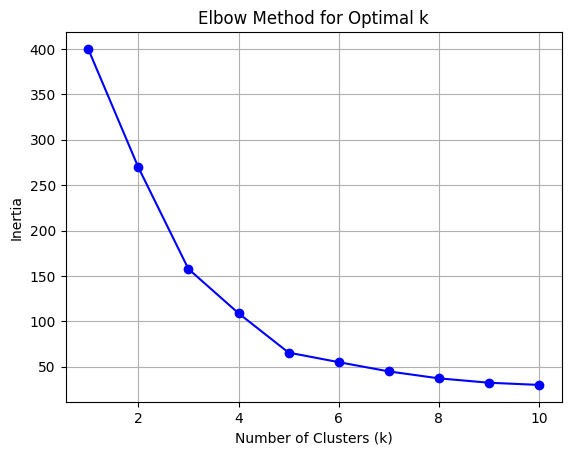

In [ ]:
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels = kmeans.fit(X_scaled)

In [ ]:
df['Cluster'] = cluster_labels.labels_

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [ ]:
# 6. Get centroids in original scale
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

# 7. Create interactive plot with Plotly
fig = px.scatter(
    df,
    x='Annual Income',
    y='Spending Score',
    color='Cluster',
    color_discrete_map={0: "red", 1: "blue", 2: "green", 3: "purple", 4: "orange"},
    title='Customer Clusters (K-Means) - Interactive Plot',
    labels={'Annual Income':'Annual Income', 'Spending Score':'Spending Score'},
    hover_data=['CustomerID', 'Gender', 'Age']  # Optional: show extra info on hover
)

# Add centroids
fig.add_trace(
    go.Scatter(
        x=centroids_original[:, 0],
        y=centroids_original[:, 1],
        mode='markers',
        marker=dict(
            symbol='x',
            size=15,
            color='black',
            line=dict(width=2, color='darkgray')
        ),
        name='Centroids'
    )
)

# Customize layout
fig.update_layout(
    coloraxis_colorbar=dict(title="Cluster"),
    showlegend=True,
    width=900,
    height=600
)

# Show plot
fig.show()